<a href="https://colab.research.google.com/github/Manish-k723/ML-models/blob/main/CiStup_IISC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import pandas as pd
import numpy as np

In [278]:
df = pd.read_csv('/content/Full_Data.csv')

In [279]:
df

,RowIdx,Attribute1,Attribute2,Attribute3,Attribute4,OutputClass
0,1,19.29,31.50,0.0,428.50,0
1,2,20.39,30.20,0.0,726.00,0
2,3,19.52,27.36,392.5,486.75,0
3,4,21.00,24.89,0.0,445.50,0
4,5,20.60,22.13,0.0,445.75,0
...,...,...,...,...,...,...
6163,6164,19.55,29.89,0.0,442.00,0
6164,6165,22.84,26.50,651.0,1022.00,1
6165,6166,21.00,19.70,0.0,467.50,0
6166,6167,21.39,19.89,50.0,708.50,0


In [280]:
other_df = df.copy()

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RowIdx       6168 non-null   int64  
 1   Attribute1   6168 non-null   float64
 2   Attribute2   6168 non-null   float64
 3   Attribute3   6168 non-null   float64
 4   Attribute4   6168 non-null   float64
 5   OutputClass  6168 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 289.2 KB


In [282]:
df.isna().sum()

RowIdx         0
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
OutputClass    0
dtype: int64

In [283]:
df.drop(['RowIdx','Attribute2'],axis = 1,inplace =True)

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

<Axes: >

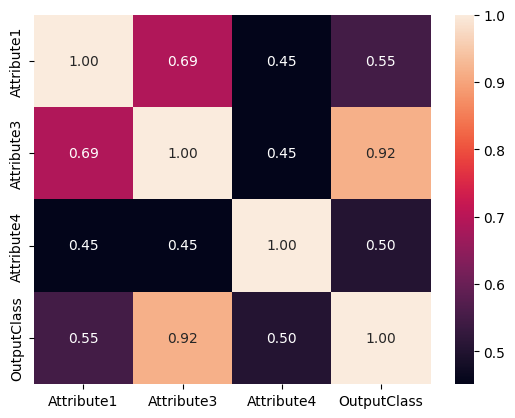

In [209]:
sns.heatmap(df.corr(),annot = True, fmt = '.2f')

The important columns to consider here are Attribute1, Attribute3 and Attribute4

In [210]:
!pip install pandas_profiling --upgrade --quiet

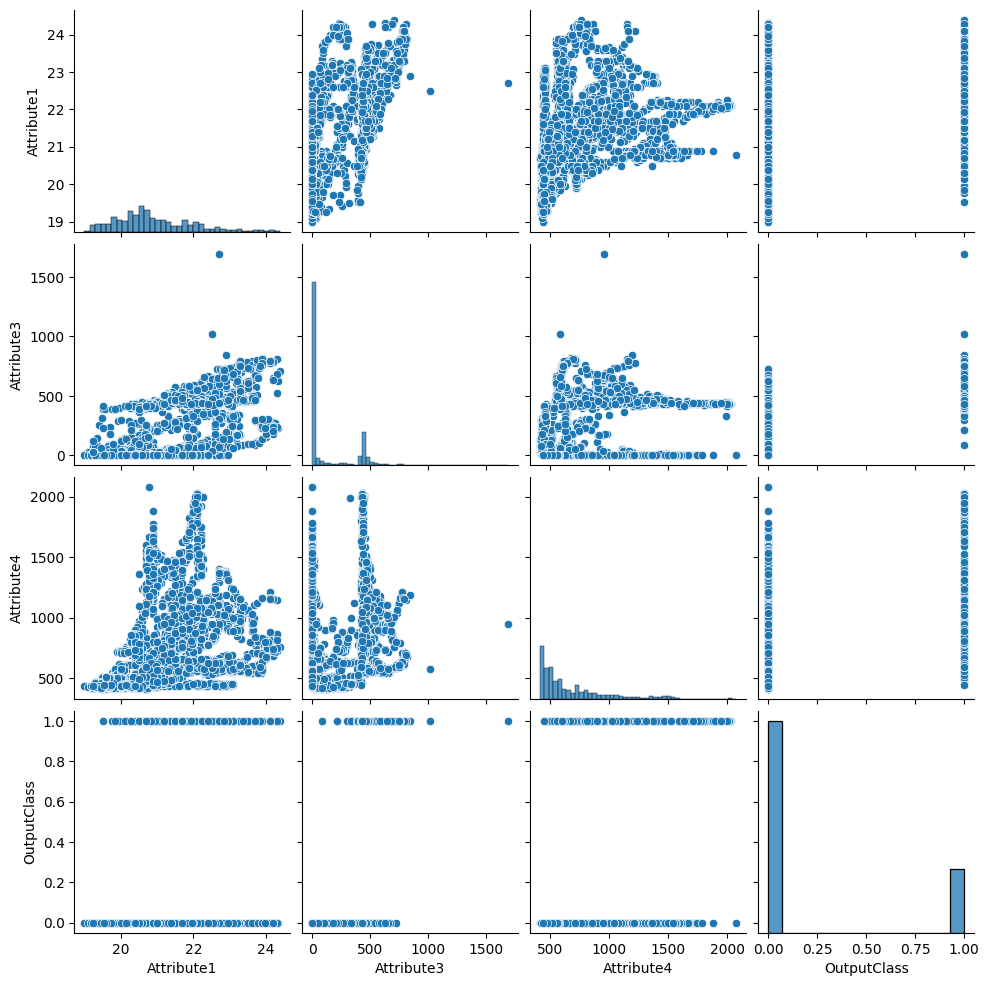

In [211]:
sns.pairplot(df)

In [212]:
#  sns.boxplot(df['Attribute1'])#, y = df['Attribute3'])

In [213]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Notable points are:


1.   Attribute 3, attribute 1 and attribute4 highly correlated. It is not a good point. It means they are somewhat dependent on each other.
2.   OutputClass is highly correlated with attribute3, 1 and 4. 
3.   Attribute 3 has lot of zero values, Approx 61%.



In [214]:
df

,Attribute1,Attribute3,Attribute4,OutputClass
0,19.29,0.0,428.50,0
1,20.39,0.0,726.00,0
2,19.52,392.5,486.75,0
3,21.00,0.0,445.50,0
4,20.60,0.0,445.75,0
...,...,...,...,...
6163,19.55,0.0,442.00,0
6164,22.84,651.0,1022.00,1
6165,21.00,0.0,467.50,0
6166,21.39,50.0,708.50,0


In [215]:
df[df.duplicated()==True]

,Attribute1,Attribute3,Attribute4,OutputClass
94,19.39,0.0,437.0,0
131,20.00,0.0,533.5,0
288,20.89,0.0,573.0,0
291,20.29,0.0,715.5,0
386,19.89,0.0,526.0,0
...,...,...,...,...
6142,20.50,0.0,434.0,0
6147,20.00,0.0,437.0,0
6149,20.20,0.0,434.0,0
6150,19.60,0.0,503.5,0


In [216]:
df.shape

(6168, 4)

In [217]:
df = df.drop_duplicates(keep = 'first')
df.shape

(5404, 4)

In [218]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test, y_train,y_test = tts(df.drop('OutputClass', axis = 1), df['OutputClass'], test_size = 0.2, random_state = 42)

<Axes: ylabel='OutputClass'>

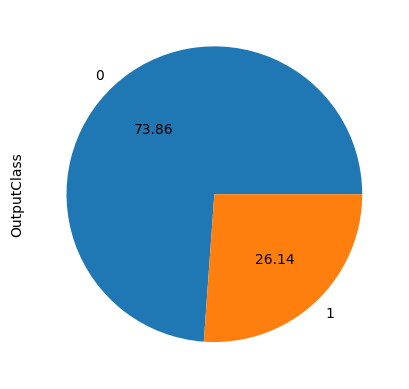

In [219]:
y_train.value_counts().plot(kind = 'pie', autopct = '%.2f')

In [220]:
x_train.shape, x_test.shape

((4323, 3), (1081, 3))

In [221]:
df.describe()

,Attribute1,Attribute3,Attribute4,OutputClass
count,5404.000000,5404.000000,5404.000000,5404.000000
mean,21.019097,149.205960,715.684654,0.262583
std,1.067961,217.004182,321.702011,0.440079
min,19.000000,0.000000,412.750000,0.000000
25%,20.290000,0.000000,472.627500,0.000000
50%,20.790000,0.000000,583.415000,0.000000
75%,21.700000,419.000000,844.000000,1.000000
max,24.390000,1697.250000,2076.500000,1.000000


In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [253]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

In [254]:
x_train_trans1 = scaler1.fit_transform(x_train)
x_test_trans1 = scaler1.transform(x_test)
x_train_trans2 = scaler2.fit_transform(x_train)
x_test_trans2 = scaler2.transform(x_test)

In [255]:
from sklearn.linear_model import LogisticRegression

In [256]:
clf1 = LogisticRegression()
clf2 = LogisticRegression()

In [257]:
clf1.fit(x_train_trans1,y_train)
clf2.fit(x_train_trans2,y_train)

LogisticRegression()

In [258]:
from sklearn.metrics import accuracy_score

In [259]:
print('Accuracy of standardized data is ',accuracy_score(y_test,clf1.predict(x_test_trans1)))
print('Accuracy of Normalized data is ',accuracy_score(y_test,clf2.predict(x_test_trans2)))

Accuracy of standardized data is  0.9935245143385754
Accuracy of Normalized data is  0.9944495837187789


In [285]:
df_trans = scaler1.fit_transform(df.drop('OutputClass', axis = 1))

In [286]:
df_trans

array([[-1.53770786, -0.62740323, -0.84445057],
       [-0.49585201, -0.62740323,  0.10653903],
       [-1.31986527,  1.24926014, -0.6582484 ],
       ...,
       [ 0.08190441, -0.62740323, -0.71978303],
       [ 0.45128967, -0.38833783,  0.05059846],
       [-0.49585201, -0.62740323, -0.82047604]])

In [287]:
clf = LogisticRegression()

In [288]:
clf.fit(df_trans,df['OutputClass'])

LogisticRegression()

In [289]:
other_df['Predicted_outputclass'] = clf.predict(df_trans)

In [290]:
other_df

,RowIdx,Attribute1,Attribute2,Attribute3,Attribute4,OutputClass,Predicted_outputclass
0,1,19.29,31.50,0.0,428.50,0,0
1,2,20.39,30.20,0.0,726.00,0,0
2,3,19.52,27.36,392.5,486.75,0,1
3,4,21.00,24.89,0.0,445.50,0,0
4,5,20.60,22.13,0.0,445.75,0,0
...,...,...,...,...,...,...,...
6163,6164,19.55,29.89,0.0,442.00,0,0
6164,6165,22.84,26.50,651.0,1022.00,1,1
6165,6166,21.00,19.70,0.0,467.50,0,0
6166,6167,21.39,19.89,50.0,708.50,0,0


In [291]:
accuracy_score(other_df['OutputClass'],other_df['Predicted_outputclass'])

0.9892996108949417

In [292]:
final_df = other_df[['RowIdx','Predicted_outputclass']]

In [294]:
final_df.to_csv('prediction.csv')

In [295]:
from sklearn.tree import DecisionTreeClassifier